# Linear Algebra and Data Compression

In this project, we investigate how to compress continuous sound data by using finitely many numbers.

Sound data is given as a continuous function $f(t)$. If we divide the time interval into reasonably small subintervals, then on each interval, the function $f(t)$ looks like a periodic function, because the sound is a vibration that propagates as an (in general very complicated) wave of pressure and a wave is periodic. From now on, for simplicity, assume that the period of $f(t)$ is $2\pi$ and we will assume that $f(t) \in C[-\pi, \pi]$. 

On $C[-\pi, \pi]$, the following formula yields an inner product:
$$\langle g, h\rangle = \frac{1}{\pi}\int_{-\pi}^{\pi}g(t)h(t)dt.$$
Furthermore, we know that the following set is an orthonormal set. 
$$T_n := \{\frac{1}{\sqrt{2}}, \sin t, \cos t, \sin 2t, \cos 2t, \cdots, \sin nt, \cos nt\}$$
Let $W_n$ be the sub vector space of $C[-\pi, \pi]$ spanned by $T_n$. Then for any $f(t) \in C[-\pi, \pi]$, its best approximation in $W_n$ is given by
$$\hat{f}_n(t) := \langle f(t), \frac{1}{\sqrt{2}}\rangle \frac{1}{\sqrt{2}} + \sum_{k=1}^n \langle f(t), \sin kt\rangle \sin kt + \sum_{k=1}^n \langle f(t), \cos kt\rangle \cos kt.$$

#### Construct a function Simpson(f, m) which evaluates the definite integral $$\int_{-\pi}^{\pi}f(t)dt$$ with $m$ intervals by using Simpson's rule. Note that $m$ has to be an even number.

In [4]:
import numpy as np

def function(x):
    return np.sin(2*x)+1
    
#np.pi

#print(function(0))


def Simpson(f, n):
    a = -1*np.pi
    b = np.pi
    h = (b-a)/n
    
    x0 = function(a)+function(b)
    x1 = 0
    x2 = 0
    
    for i in range(n-1):
        x = a + (i*h)
        if i%2==0:
            x2 = x2 + function(x)
        else:
            x1 = x1 + function(x)
    sum = h*(x0+2*x2+4*x1)/3
    return sum

print(Simpson(function,30))

#Actual integration of sin(2x)+1 from -pi to pi is approximately 6.283185307179586


6.257141264782947


#### Create a function FourierCoeff(f, n) which returns the list of Fourier coefficients $a_0, a_1, \cdots, a_n$ and $b_1, b_2, \cdots, b_n$ where $a_0 = \langle f(t), 1\rangle$, $a_k = \langle f(t), \cos kt\rangle$ for $k \ge 1$, $b_k = \langle f(t), \sin kt\rangle$. To calculate each coefficient, use the function Simpson(f, m) with $m = 200$.

In [5]:
import numpy as np

#test function
def func(t):
    return np.exp(t)+1;

#sin(kt) for inner products 1<= k <= n
def sinkt(t,k):
    return np.sin(k*t)

#sin(kt) for inner products 1<= k <= n
def coskt(t,k):
    return np.cos(k*t)

#the f parameter takes in one parameter; this is modified in FourierCoeffs()
def Simpson(f, m):
    a = -1*np.pi
    b = np.pi
    h = (b-a)/m
    
    x0 = f(a)+f(b)
    x1 = 0
    x2 = 0
    
    for i in range(m-1):
        x = a + (i*h)
        if i%2==0:
            x2 = x2 + f(x)
        else:
            x1 = x1 + f(x)
    sum = h*(x0+2*x2+4*x1)/3
    return sum

def FourierCoeffs(f, n):
    coeffs = np.zeros(2*n+1)
    #increasing m increases accuracy of the inner products
    m=200
    for k in range(0, 2*n+1):
        #calculate constant term when k = 0, this is a_0
        if (k==0):
            coeffs[k] = (1/np.pi)*Simpson(f,m)*(1/np.sqrt(2))
        #calculate coefficients of cos(kt) terms using slightly modified Simpson(f,m)
        elif(k > 0 and k <= n):
            a = -1*np.pi
            b = np.pi
            h = (b-a)/m
        
            x0 = f(a)*coskt(a,k)+f(b)*coskt(b,k)
            x1 = 0
            x2 = 0
    
            for i in range(m-1):
                x = a + (i*h)
                if i%2==0:
                    x2 = x2 + f(x)*coskt(x,k)
                else:
                    x1 = x1 + f(x)*coskt(x,k)
                sum = (h*(x0+2*x2+4*x1)/3)
            
            coeffs[k] = (1/np.pi)*sum
        #calculate coefficients of sin(kt) terms using slightly modified Simpson(f,m)
        else:
            a = -1*np.pi
            b = np.pi
            h = (b-a)/m
        
            x0 = f(a)*coskt(a,k-n)+f(b)*sinkt(b,k-n)
            x1 = 0
            x2 = 0
    
            for i in range(m-1):
                x = a + (i*h)
                if i%2==0:
                    x2 = x2 + f(x)*sinkt(x,k-n)
                else:
                    x1 = x1 + f(x)*sinkt(x,k-n)
                sum = h*(x0+2*x2+4*x1)/3
            coeffs[k] = (1/np.pi)*sum
    return coeffs

#calculate n fourier coefficients for the test function and print
print("list of a_0, a_1, ..., a_n, b_1, ..., b_n:")
print(FourierCoeffs(func,3))

list of a_0, a_1, ..., a_n, b_1, ..., b_n:
[ 6.3970375  -3.37085328  1.16566838 -0.43122202  3.66278982 -2.91777345
  2.17277691]


Note that the initial data is a continuous function, but the approximation is recorded as a list of $2n+1$ numbers!

#### Create a function FourierApprox(f) which plots the graphs of $f(t)$ and $S_n(t)$ with $n = 2, 5, 10$ over $[-\pi, \pi]$ on the same plane (with different color). Test your function with $f(t) = \cosh(t)$ and $f(t) = \sqrt{\pi^2-t^2}$. Run the function with your favorite $f(t)$, too. Note that to get a 'periodic' continuous function $f(t)$ defined on $\mathbb{R}$, $f(-\pi) = f(\pi)$. Test your function with $f(t) = e^t$ as well (Note that this one is continuous on $[-\pi, \pi]$, but does not continuously extend to $\mathbb{R}$ because $f(-\pi) \ne f(\pi)$. See what happens near two boundary points.). 

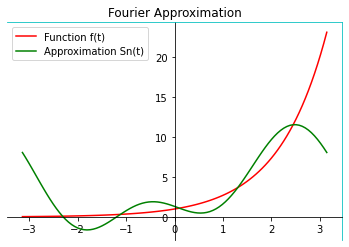

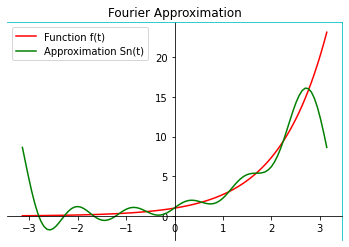

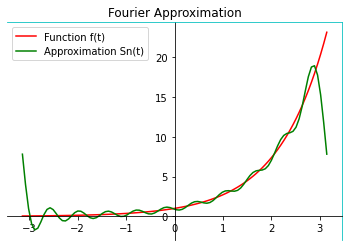

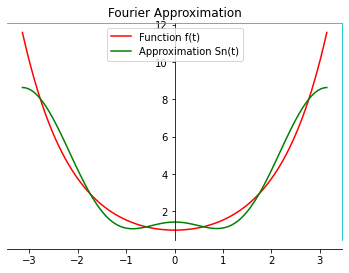

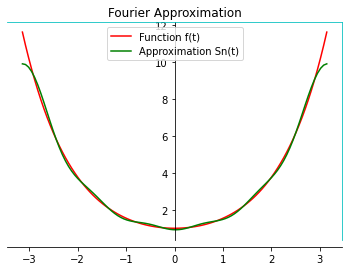

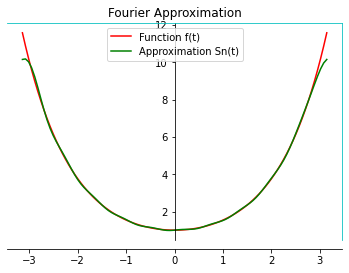

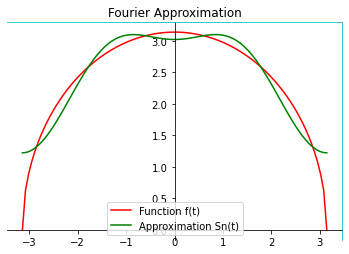

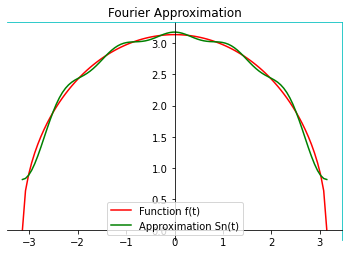

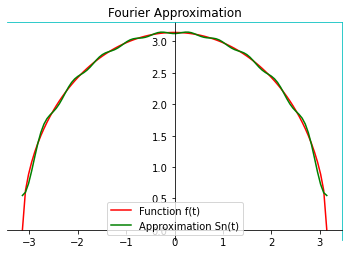

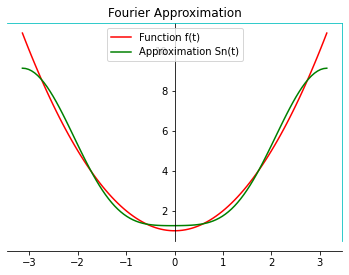

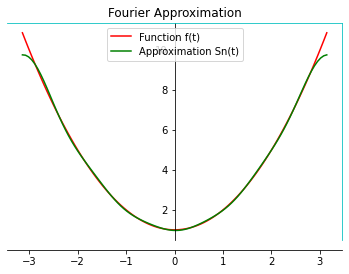

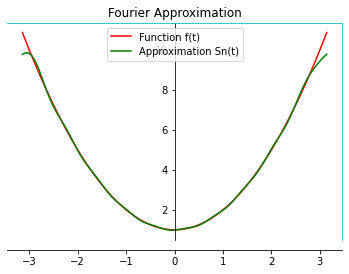

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#e^t
def func1(t):
    return np.exp(t);

#cosh(t)
def func2(t):
    return np.cosh(t);

#square root of the quantity pi^2 minus t^2
def func3(t):
    return np.sqrt(((np.pi)**2)-t**2);

#t^2 + 1 = favorite function of choice
def func4(t):
    return t**2 +1;

#used to calculate fourier coefficients
def sinkt(t,k):
    return np.sin(k*t)
    
#used to calculate fourier coefficients
def coskt(t,k):
    return np.cos(k*t)

def Simpson(f, m):
    a = -1*np.pi
    b = np.pi
    h = (b-a)/m
    
    x0 = f(a)+f(b)
    x1 = 0
    x2 = 0
    
    for i in range(m-1):
        x = a + (i*h)
        if i%2==0:
            x2 = x2 + f(x)
        else:
            x1 = x1 + f(x)
    sum = h*(x0+2*x2+4*x1)/3
    return sum

def FourierCoeffs(f, n):
    coeffs = np.zeros(2*n+1)
    #increasing m increases accuracy of the inner products
    m=200
    for k in range(0, 2*n+1):
        #calculate constant term when k = 0, this is a_0
        if (k==0):
            coeffs[k] = (1/np.pi)*Simpson(f,m)*(1/np.sqrt(2))
        #calculate coefficients of cos(kt) terms using slightly modified Simpson(f,m)
        elif(k > 0 and k <= n):
            a = -1*np.pi
            b = np.pi
            h = (b-a)/m
        
            x0 = f(a)*coskt(a,k)+f(b)*coskt(b,k)
            x1 = 0
            x2 = 0
    
            for i in range(m-1):
                x = a + (i*h)
                if i%2==0:
                    x2 = x2 + f(x)*coskt(x,k)
                else:
                    x1 = x1 + f(x)*coskt(x,k)
                sum = (h*(x0+2*x2+4*x1)/3)
            
            coeffs[k] = (1/np.pi)*sum
        #calculate coefficients of sin(kt) terms using slightly modified Simpson(f,m)
        else:
            a = -1*np.pi
            b = np.pi
            h = (b-a)/m
        
            x0 = f(a)*sinkt(a,k-n)+f(b)*sinkt(b,k-n)
            x1 = 0
            x2 = 0
    
            for i in range(m-1):
                x = a + (i*h)
                if i%2==0:
                    x2 = x2 + f(x)*sinkt(x,k-n)
                else:
                    x1 = x1 + f(x)*sinkt(x,k-n)
                sum = h*(x0+2*x2+4*x1)/3
            coeffs[k] = (1/np.pi)*sum
    return coeffs

def FourierApprox(f):
    n=0
    while(n <=10):
        #execute the following only when n is 2,5, or 10
        if(n == 2 or n ==5 or n== 10):
            #print("n = ", n)
            coeffs = FourierCoeffs(f, n)
            yapprox = 0
            #store the function in a variable
            t = np.linspace(-np.pi, np.pi, 100)
            y = f(t)
            #set up the plot
            fig = plt.figure()
            axes = fig.add_subplot(1,1,1)
            plt.title("Fourier Approximation")
            axes.spines['left'].set_position('center')
            axes.spines['bottom'].set_position('zero')
            axes.spines['right'].set_color('c')
            axes.spines['top'].set_color('c')
            #store the approximation in a variable
            for i in range(0, 2*n+1):
                if (i==0):
                    yapprox = yapprox + coeffs[i]*(1/np.sqrt(2))
                elif (i <=n and i >0):
                    yapprox = yapprox + coeffs[i]*np.cos(i*t)
                else:
                    yapprox = yapprox + coeffs[i]*np.sin((i-n)*t)
            #plot the function and the approximation
            plt.plot(t,y,'r')
            plt.plot(t,yapprox,'g')
            plt.legend(['Function f(t)', 'Approximation Sn(t)'])
        n = n+1
FourierApprox(func1)
FourierApprox(func2)
FourierApprox(func3)
FourierApprox(func4)